# <b>Estatística</b>
---

## <b>Introdução</b>

### <i>Fatos são obstinados, mas estatísticas são mais maleáveis</i>

    — Mark Twain

### Estatística se refere à matemática e às técnicas das quais nós entendemos dados. É um campo rico e enorme, que encaixa melhor em uma biblioteca inteira do que em um capítulo de um livro. A discussão de estatística nesse livro não será tão profunda; será necessário explorar mais de outras fontes.

## <b>Descrevendo um único conjunto de dados</b>

### Com uma combinação de sorte e adaptabilidade, a rede social do capítulo 1 cresceu e agora abriga dezenas de membros, e o diretor do projeto te pede algum tipo de descrição de quantos amigos os membros possuem para que ele possa incluir esse valor em suas conversas de elevador.

### Usando técnicas do capítulo 1, você consegue facilmente produzir esses dados. Mas agora você encontra um problema: como descrevê-los?

### Uma descrição óbvia de qualquer conjunto de dados seria os dados em si. Para um dataset pequeno o suficiente, essa pode ser até mesmo a melhor visualização. Porém, para um dataset maior, isso não tem sentido; (imagine-se olhando para uma lista de um milhão de números tentando tirar alguma conclusão). Por esse motivo, utilizamos estatística para destilar e comunicar características importantes dos dados.

### Como um primeiro approach, você coloca a quantidade de amigos em um histograma:

In [24]:
import random
# número total de registros
total_registros = 200

# parâmetro para controlar a distribuição
parametro = 2.0

# número de amigos com distribuição negativa
lista_amigos = [random.randint(0, 100) for _ in range(total_registros)]
lista_amigos += [random.randint(0, 50) for _ in range(total_registros)]
lista_amigos += [random.randint(0, 25) for _ in range(total_registros)]
lista_amigos += [random.randint(0, 10) for _ in range(int(total_registros/2))]

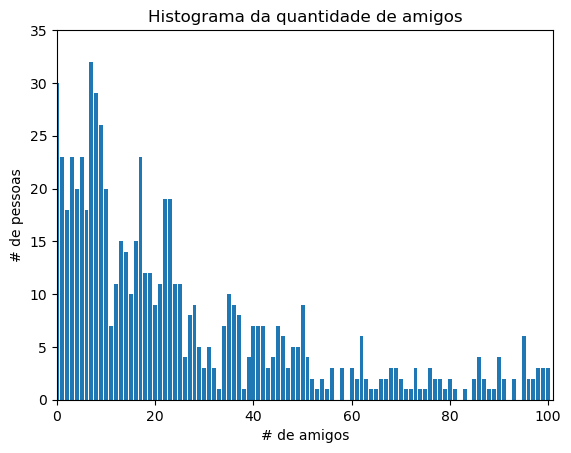

In [26]:
from collections import Counter
import matplotlib.pyplot as plt

quantidade_de_amigos = Counter(lista_amigos)
xs = range(101) # maior valor é 100
ys = [quantidade_de_amigos[x] for x in xs] # a altura é o número de amigos
plt.bar(xs, ys)
plt.axis([0, 101, 0, 35])
plt.title("Histograma da quantidade de amigos")
plt.xlabel("# de amigos")
plt.ylabel("# de pessoas")
plt.show()

### Infelizmente, essa visualização ainda é muito difícil de encaixar em conversas. Então você começa a desenvolver algumas estatísticas. Provavelmente a mais simples é o número de pontos de dados:

In [27]:
numero_de_pontos = len(lista_amigos)
numero_de_pontos

700

### Você também está provavelmente interessado no maior e no menor valor:

In [28]:
maior_valor = max(lista_amigos)
menor_valor = min(lista_amigos)

print(maior_valor)
print(menor_valor)

100
0
